# Name: Nisrin Dhoondia  

# Email: nisrin.dhoondia@gmail.com  



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')

In [ ]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [ ]:
df.iloc[1023]['btc_market_price']

13.6888

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Date                                                 2906 non-null   datetime64[ns]
 1   btc_market_price                                     2906 non-null   float64       
 2   btc_total_bitcoins                                   2879 non-null   float64       
 3   btc_market_cap                                       2906 non-null   float64       
 4   btc_trade_volume                                     2885 non-null   float64       
 5   btc_blocks_size                                      2877 non-null   float64       
 6   btc_avg_block_size                                   2906 non-null   float64       
 7   btc_n_orphaned_blocks                                2906 non-null   int64         
 8 

In [ ]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [ ]:
df.fillna(df.mean(), inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [ ]:
colname = list(df.columns)
colname.remove('Date')
colname.remove('btc_market_price')
colname

['btc_total_bitcoins',
 'btc_market_cap',
 'btc_trade_volume',
 'btc_blocks_size',
 'btc_avg_block_size',
 'btc_n_orphaned_blocks',
 'btc_n_transactions_per_block',
 'btc_median_confirmation_time',
 'btc_hash_rate',
 'btc_difficulty',
 'btc_miners_revenue',
 'btc_transaction_fees',
 'btc_cost_per_transaction_percent',
 'btc_cost_per_transaction',
 'btc_n_unique_addresses',
 'btc_n_transactions',
 'btc_n_transactions_total',
 'btc_n_transactions_excluding_popular',
 'btc_n_transactions_excluding_chains_longer_than_100',
 'btc_output_volume',
 'btc_estimated_transaction_volume',
 'btc_estimated_transaction_volume_usd']

In [ ]:
pearson_correlation = {}

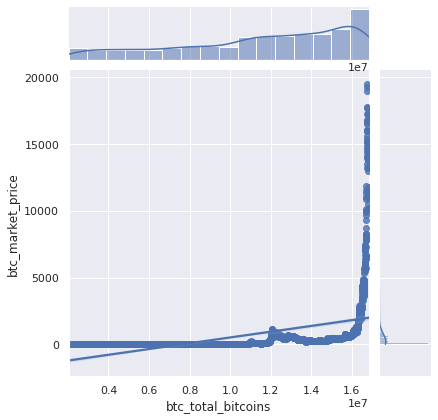

(0.3922339090142384, 1.704175763115078e-107)


In [ ]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(data=df, x='btc_total_bitcoins',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_total_bitcoins'], df['btc_market_price']))

In [ ]:
# pearsonr(x, y)

# Pearson correlation coefficient and p-value for testing non-correlation.

In [ ]:
stats.pearsonr(df['btc_total_bitcoins'], df['btc_market_price'])[0]

0.3922339090142384

In [ ]:
np.corrcoef(df['btc_total_bitcoins'], df['btc_market_price'])

array([[1.        , 0.39223391],
       [0.39223391, 1.        ]])

In [ ]:
np.corrcoef(df['btc_total_bitcoins'], df['btc_market_price'])[0, 1]

0.3922339090142383

In [ ]:
pearson_correlation['btc_total_bitcoins'] = round(np.corrcoef(df['btc_total_bitcoins'], df['btc_market_price'])[0, 1], 2)

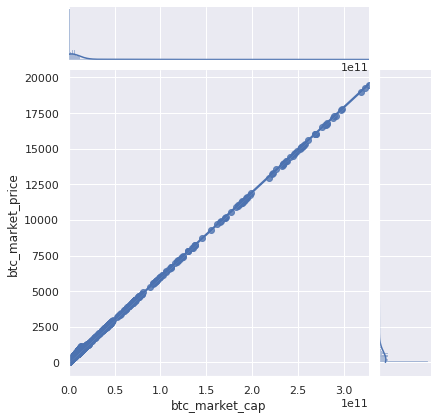

(0.9997826765218777, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_market_cap',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_market_cap'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_market_cap'], df['btc_market_price'])[0, 1]

0.9997826765218772

In [ ]:
pearson_correlation['btc_market_cap'] = round(np.corrcoef(df['btc_market_cap'], df['btc_market_price'])[0, 1],2)

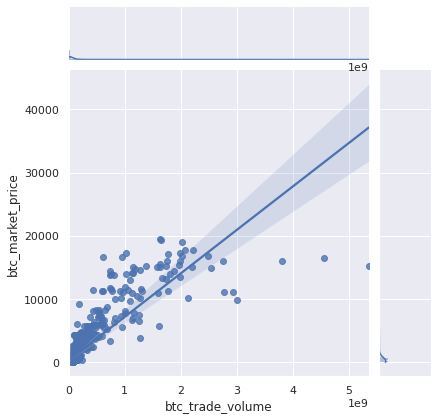

(0.8686075377272552, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_trade_volume',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_trade_volume'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_trade_volume'], df['btc_market_price'])[0, 1]

0.8686075377272547

In [ ]:
pearson_correlation['btc_trade_volume'] = round(np.corrcoef(df['btc_trade_volume'], df['btc_market_price'])[0, 1],2)

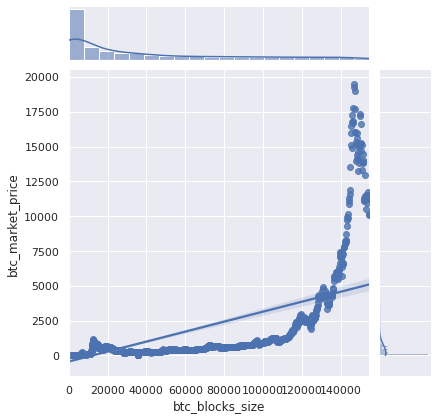

(0.6740588562568346, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_blocks_size',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_blocks_size'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_blocks_size'], df['btc_market_price'])[0, 1]

0.6740588562568344

In [ ]:
pearson_correlation['btc_blocks_size'] = round(np.corrcoef(df['btc_blocks_size'], df['btc_market_price'])[0, 1],2)

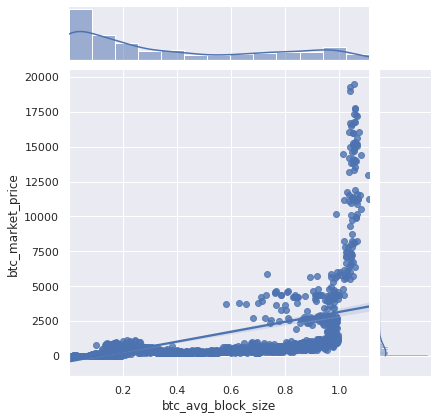

(0.5440325252675923, 1.3663233539672172e-223)


In [ ]:
sns.jointplot(data=df, x='btc_avg_block_size',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_avg_block_size'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_avg_block_size'], df['btc_market_price'])[0, 1]

0.5440325252675922

In [ ]:
pearson_correlation['btc_avg_block_size'] = round(np.corrcoef(df['btc_avg_block_size'], df['btc_market_price'])[0, 1], 2)

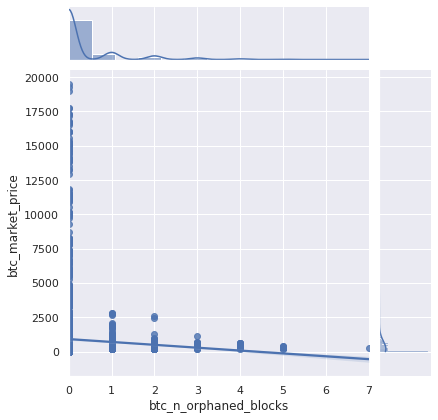

(-0.0763999933931541, 3.743366863806207e-05)


In [ ]:
sns.jointplot(data=df, x='btc_n_orphaned_blocks',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_n_orphaned_blocks'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_n_orphaned_blocks'], df['btc_market_price'])[0, 1]

-0.07639999339315427

In [ ]:
pearson_correlation['btc_n_orphaned_blocks'] = round(np.corrcoef(df['btc_n_orphaned_blocks'], df['btc_market_price'])[0, 1], 2)

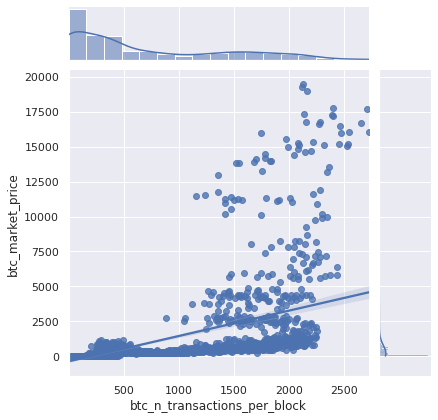

(0.5441247005124087, 1.1107960899527517e-223)


In [ ]:
sns.jointplot(data=df, x='btc_n_transactions_per_block',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_n_transactions_per_block'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_n_transactions_per_block'], df['btc_market_price'])[0, 1]

0.5441247005124084

In [ ]:
pearson_correlation['btc_n_transactions_per_block'] = round(np.corrcoef(df['btc_n_transactions_per_block'], df['btc_market_price'])[0, 1], 2)

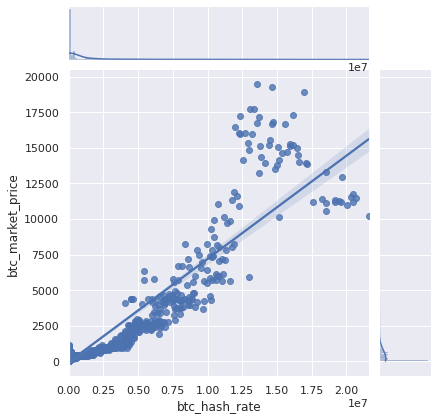

(0.9208760210000024, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_hash_rate',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_hash_rate'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_hash_rate'], df['btc_market_price'])[0, 1]


0.9208760210000023

In [ ]:
pearson_correlation['btc_hash_rate'] = round(np.corrcoef(df['btc_hash_rate'], df['btc_market_price'])[0, 1], 2)

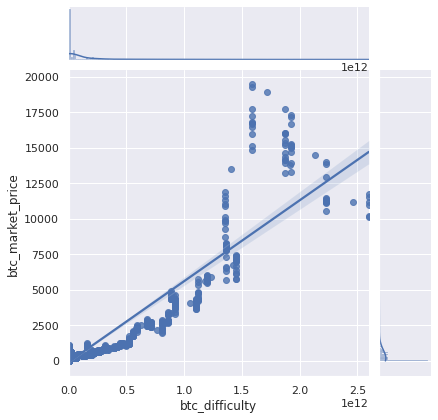

(0.9169129774377394, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_difficulty',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_difficulty'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_difficulty'], df['btc_market_price'])[0, 1]

0.9169129774377389

In [ ]:
pearson_correlation['btc_difficulty'] = round(np.corrcoef(df['btc_difficulty'], df['btc_market_price'])[0, 1], 2)

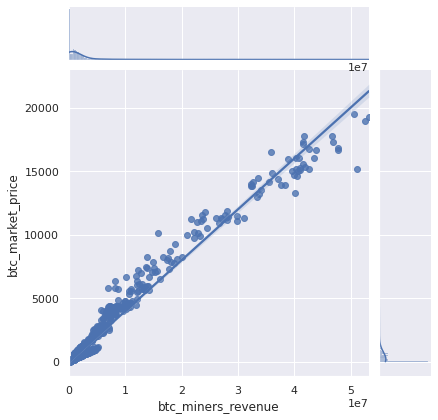

(0.9867320856324153, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_miners_revenue',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_miners_revenue'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_miners_revenue'], df['btc_market_price'])[0, 1]

0.986732085632415

In [ ]:
pearson_correlation['btc_miners_revenue'] = round(np.corrcoef(df['btc_miners_revenue'], df['btc_market_price'])[0, 1], 2)

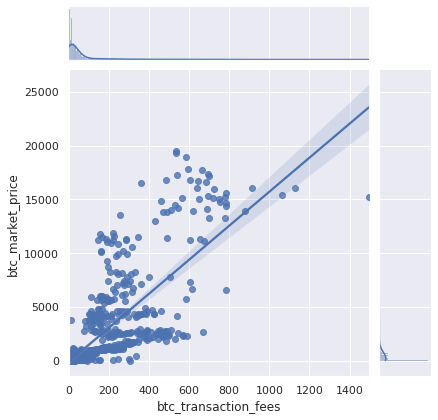

(0.8065676796632091, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_transaction_fees',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_transaction_fees'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_transaction_fees'], df['btc_market_price'])[0, 1]

0.8065676796632089

In [ ]:
pearson_correlation['btc_transaction_fees'] = round(np.corrcoef(df['btc_transaction_fees'], df['btc_market_price'])[0, 1], 2)

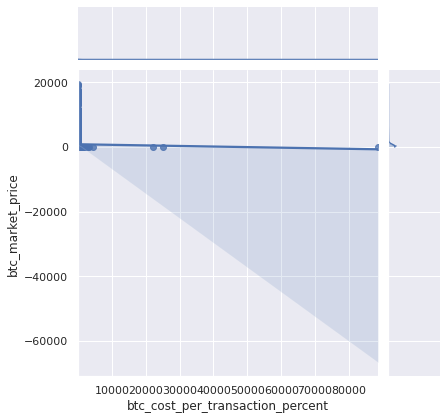

(-0.01351729363185455, 0.466368178672829)


In [ ]:
sns.jointplot(data=df, x='btc_cost_per_transaction_percent',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_cost_per_transaction_percent'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_cost_per_transaction_percent'], df['btc_market_price'])[0, 1]

-0.013517293631854553

In [ ]:
pearson_correlation['btc_cost_per_transaction_percent'] = round(np.corrcoef(df['btc_cost_per_transaction_percent'], df['btc_market_price'])[0, 1], 2)

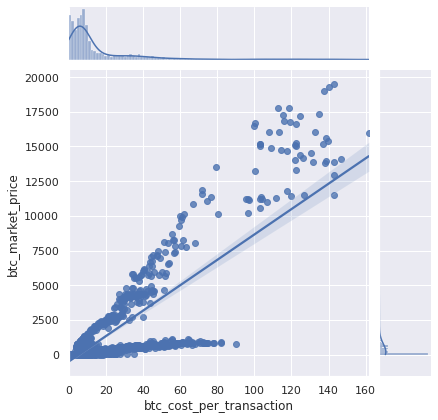

(0.815507341471675, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_cost_per_transaction',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_cost_per_transaction'], df['btc_market_price']))


In [ ]:
np.corrcoef(df['btc_cost_per_transaction'], df['btc_market_price'])[0, 1]

0.8155073414716753

In [ ]:
pearson_correlation['btc_cost_per_transaction'] = round(np.corrcoef(df['btc_cost_per_transaction'], df['btc_market_price'])[0, 1], 2)

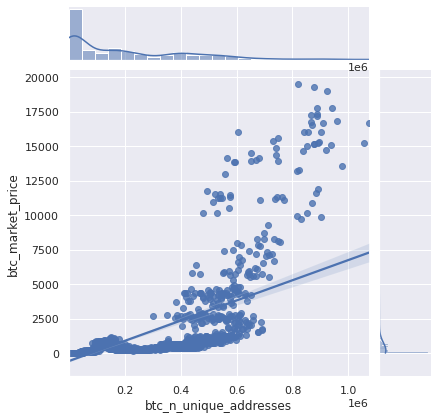

(0.6639174028794768, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_n_unique_addresses',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_n_unique_addresses'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_n_unique_addresses'], df['btc_market_price'])[0, 1]

0.6639174028794769

In [ ]:
pearson_correlation['btc_n_unique_addresses'] = round(np.corrcoef(df['btc_n_unique_addresses'], df['btc_market_price'])[0, 1], 2)

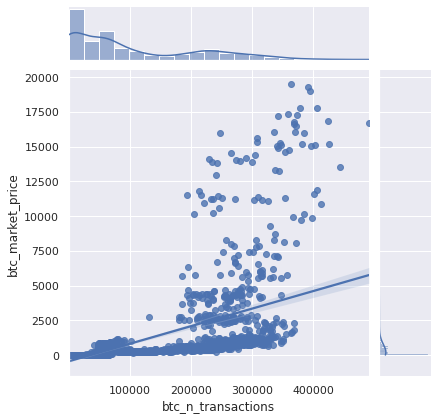

(0.5696027129379864, 1.2016436785317772e-249)


In [ ]:
sns.jointplot(data=df, x='btc_n_transactions',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_n_transactions'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_n_transactions'], df['btc_market_price'])[0, 1]

0.5696027129379866

In [ ]:
pearson_correlation['btc_n_transactions'] = round(np.corrcoef(df['btc_n_transactions'], df['btc_market_price'])[0, 1], 2)

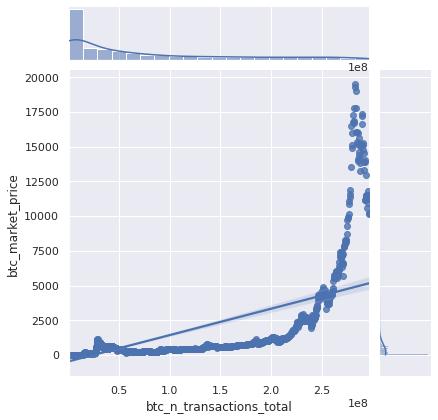

(0.6800478813410609, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_n_transactions_total',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_n_transactions_total'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_n_transactions_total'], df['btc_market_price'])[0, 1]

0.680047881341061

In [ ]:
pearson_correlation['btc_n_transactions_total'] = round(np.corrcoef(df['btc_n_transactions_total'], df['btc_market_price'])[0, 1], 2)

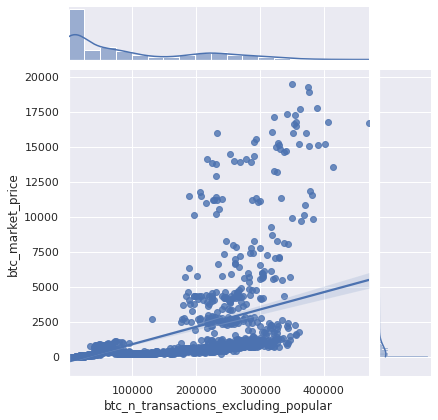

(0.558416046720704, 5.737435637635552e-238)


In [ ]:
sns.jointplot(data=df, x='btc_n_transactions_excluding_popular',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_n_transactions_excluding_popular'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_n_transactions_excluding_popular'], df['btc_market_price'])[0, 1]

0.5584160467207041

In [ ]:
pearson_correlation['btc_n_transactions_excluding_popular'] = round(np.corrcoef(df['btc_n_transactions_excluding_popular'], df['btc_market_price'])[0, 1], 2)

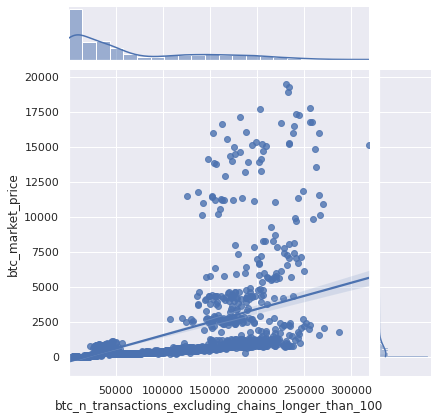

(0.5672811999602522, 3.470522799867536e-247)


In [ ]:
sns.jointplot(data=df, x='btc_n_transactions_excluding_chains_longer_than_100',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_n_transactions_excluding_chains_longer_than_100'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_n_transactions_excluding_chains_longer_than_100'], df['btc_market_price'])[0, 1]

0.5672811999602522

In [ ]:
pearson_correlation['btc_n_transactions_excluding_chains_longer_than_100'] = round(np.corrcoef(df['btc_n_transactions_excluding_chains_longer_than_100'], df['btc_market_price'])[0, 1], 2)

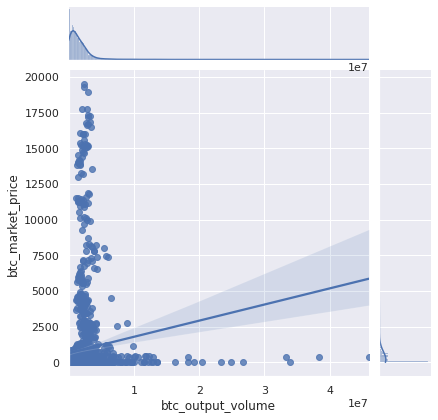

(0.11173404047261981, 1.5448507491012516e-09)


In [ ]:
sns.jointplot(data=df, x='btc_output_volume',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_output_volume'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_output_volume'], df['btc_market_price'])[0, 1]

0.11173404047261981

In [ ]:
pearson_correlation['btc_output_volume'] = round(np.corrcoef(df['btc_output_volume'], df['btc_market_price'])[0, 1], 2)

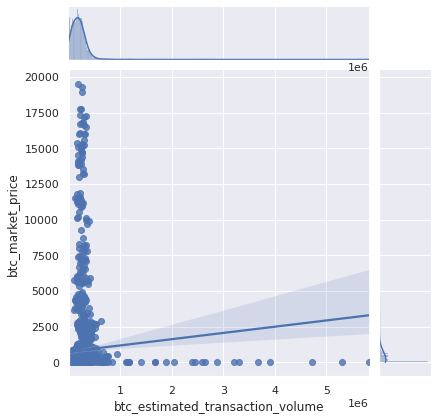

(0.050893765339490915, 0.0060668754039499015)


In [ ]:
sns.jointplot(data=df, x='btc_estimated_transaction_volume',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_estimated_transaction_volume'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_estimated_transaction_volume'], df['btc_market_price'])[0, 1]

0.050893765339490894

In [ ]:
pearson_correlation['btc_estimated_transaction_volume'] = round(np.corrcoef(df['btc_estimated_transaction_volume'], df['btc_market_price'])[0, 1], 2)

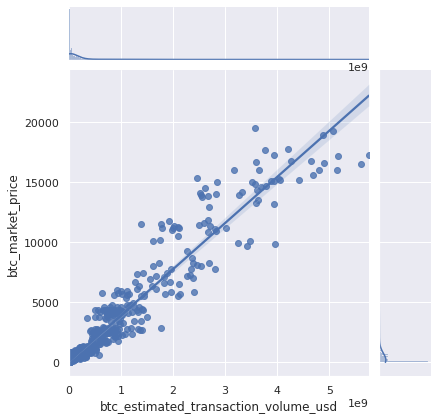

(0.9683077328629318, 0.0)


In [ ]:
sns.jointplot(data=df, x='btc_estimated_transaction_volume_usd',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_estimated_transaction_volume_usd'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_estimated_transaction_volume_usd'], df['btc_market_price'])[0, 1]

0.9683077328629317

In [ ]:
pearson_correlation['btc_estimated_transaction_volume_usd'] = round(np.corrcoef(df['btc_estimated_transaction_volume_usd'], df['btc_market_price'])[0, 1], 2)

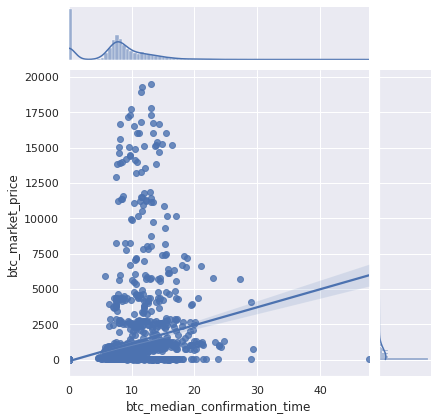

(0.2740800444667508, 3.0674519359215384e-51)


In [ ]:
sns.jointplot(data=df, x='btc_median_confirmation_time',  y='btc_market_price', kind="reg")
plt.show()
print(stats.pearsonr(df['btc_median_confirmation_time'], df['btc_market_price']))

In [ ]:
np.corrcoef(df['btc_median_confirmation_time'], df['btc_market_price'])[0, 1]

0.27408004446675055

In [ ]:
pearson_correlation['btc_median_confirmation_time'] = round(np.corrcoef(df['btc_median_confirmation_time'], df['btc_market_price'])[0, 1], 2)

In [ ]:
pearson_correlation

{'btc_avg_block_size': 0.54,
 'btc_blocks_size': 0.67,
 'btc_cost_per_transaction': 0.82,
 'btc_cost_per_transaction_percent': -0.01,
 'btc_difficulty': 0.92,
 'btc_estimated_transaction_volume': 0.05,
 'btc_estimated_transaction_volume_usd': 0.97,
 'btc_hash_rate': 0.92,
 'btc_market_cap': 1.0,
 'btc_median_confirmation_time': 0.27,
 'btc_miners_revenue': 0.99,
 'btc_n_orphaned_blocks': -0.08,
 'btc_n_transactions': 0.57,
 'btc_n_transactions_excluding_chains_longer_than_100': 0.57,
 'btc_n_transactions_excluding_popular': 0.56,
 'btc_n_transactions_per_block': 0.54,
 'btc_n_transactions_total': 0.68,
 'btc_n_unique_addresses': 0.66,
 'btc_output_volume': 0.11,
 'btc_total_bitcoins': 0.39,
 'btc_trade_volume': 0.87,
 'btc_transaction_fees': 0.81}

In [ ]:
len(pearson_correlation)

22

In [ ]:
df_bitcoin = df.filter(['btc_market_cap', 'btc_n_transactions', 'btc_miners_revenue', 'btc_cost_per_transaction', 
                        'btc_difficulty', 'btc_hash_rate', 'btc_cost_per_transaction_percent', 'btc_market_price'], axis=1)

In [ ]:
X = df_bitcoin.drop('btc_market_price', axis = 1)
y = df_bitcoin['btc_market_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2324, 7), (582, 7), (2324,), (582,))

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = model.predict(X_test)

In [ ]:
#MSE
print('MSE:')
print(round(mean_squared_error(y_test, pred), 0))

MSE:
389.0
